<p><h1>SFW <small> - Stefanini Fashion Week</small></h1></p>

A Stefanini estava se preparando para realizar a primeira Fashion Week tecnológica do mundo, sua roupas são feitas com tecnologia de ponta, algumas contendo até inteligência artificial para se adaptar aos gostos que seus clientes. Porém, como foi a primeira vez que a Stefanini está realizando um evento desse estilo nem tudo poderia ser perfeito, as roupas que deveriam chegar uma semana antes estavam previstas para chegar algumas horas antes do evento.

Como é uma quantidade absurda de roupas, um ser humano não ia conseguir classificar e separar tudo a tempo, porém como a Stefanini tem funcionários experientes na área de inteligência artificial, foi então demandado a eles treinar um algoritmo capaz de classificar as roupas entre:

- 0 - Camiseta
- 1 - Calça
- 2 - Pulôver
- 3 - Vestido
- 4 - Casaco
- 5 - Sandália
- 6 - Camisa
- 7 - Tênis
- 8 - Bolsa
- 9 - Tornozeleira

O Dataset a ser utilizado para desenvolver esse modelo foi o famoso Fashion-Mnist e foi carregado pelo tensorflow.

É exigido que para esse modelo seja feito um <b>Multilayer Perceptron</b>. O Framework a ser escolhido é de preferência do desenvolvedor.

<b>É necessário por comentários explicando o código</b>

\* <small>Quem desenvolver o modelo em Numpy terá uma melhor avaliação que os demais</small>

### Importações necessárias

# Exercício
## Autor: Matheus Jericó Palhares
## Email: matheusjerico1994@hotmail.com
## linkedIn: https://www.linkedin.com/in/matheusjerico

## MLP com framework Numpy;

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot  as plt
import numpy as np
from IPython.display import clear_output

#### Carregando o dataset a ser trabalhado

In [2]:
# Separando dados de treino e teste
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Verificando formato das imagens
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

# Copiando o 'X_train' antes de realizar a normalização e reshape, para visualizar as imagens.
X_train_vis = X_train.copy()

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


## 1. Pré-processamento dos dados

### 1.1 Pré-processamento das variáveis X's:
    - Transformo em array do tipo 'float' e divido por 255 para normalização os dados;
    - Os valores das matrizes das imagens que antes estavam entre 0 a 255, agora variam de 0 a 1.

In [3]:
X_train = np.array(X_train, dtype="float32") / 255.
X_test = np.array(X_test, dtype="float32") / 255.

### 1.2. Flatten na matriz de imagem para vetorização

In [4]:
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))

X_train.shape: (60000, 784)
X_test.shape: (10000, 784)


### 1.3. Visualizando formato dos dados e imagens

In [5]:
# Verificando formato das imagens após aplicar o flatten.
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (60000, 784)
y_train.shape: (60000,)
X_test.shape: (10000, 784)
y_test.shape: (10000,)


Exemplos de imagens: 


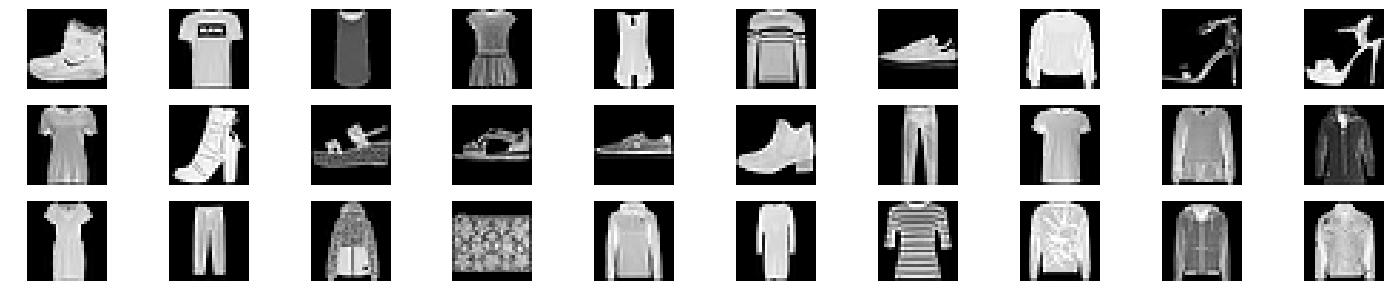

In [6]:
# Visualizando o dataset
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train_vis[:30], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

## 2. Implementando MLP com o framework Numpy

In [7]:
# Importando biblioteca numpy
import numpy as np
from sklearn.metrics import classification_report, multilabel_confusion_matrix

### 2.1. Criando a classe Layer

- Bloco de construção fictícia da Layer.

In [8]:
class Layer:
    def __init__(self):
        # inicialização dos pesos e dos vies
        self.pesos = np.zeros(shape=(entrada.shape[1], 10))
        vies = np.zeros(shape=(10,))
        pass
    
    def forward(self, entrada):
        return np.matmul(entrada, self.pesos) + vies

### 2.2. Criando função de ativação ReLu

- Inserir não linearidade na rede.
- forward():
    - Processar uma entrada e gerar uma saida.
- backward(): 
    - Propagar o gradient.

In [9]:
class ReLU(Layer):
    def __init__(self):
        pass
    
    def forward(self, entrada):
        # Se os valores de entrada forem menor do que zero, a saida é zero;
        # Se os valores de entrada forem maior do que zero, a saída é o próprio valor de entrada.
        return np.maximum(0, entrada)
    
    def backward(self, entrada, saida_grad):
        grad_relu = entrada > 0
        return grad_relu * saida_grad 

### 2.3. Criando da camada Densa

- Bloco de construção da camada Densa.


In [10]:
class Dense(Layer):
    def __init__(self, nodes_entrada, nodes_saida, lr = 0.01):
        # aprendizado
        self.lr = lr
        # Inicializando os pesos e vies
        self.pesos = np.random.randn(nodes_entrada, nodes_saida) * 0.025
        self.vies = np.zeros(nodes_saida)
        
    def forward(self, entrada):
        # (Entrada . Peso) + Vies
        return (np.matmul(entrada, self.pesos) + self.vies)
    
    def backward(self, entrada, saida_grad):
        # Calcular df/dx = df/ddense * ddense/dx
        # ddense/dx = transposta dos pesos
        entrada_grad = np.dot(saida_grad, np.transpose(self.pesos))
        
        # gradiente dos pesos e vies
        pesos_grad = np.dot(np.transpose(entrada), saida_grad)
        vies_grad = saida_grad.mean(axis=0)*entrada.shape[0]
               
        # Execução do SGD
        # Atualizando pesos e vies
        self.pesos = self.pesos - self.lr * pesos_grad
        self.vies = self.vies - self.lr * vies_grad
        
        return entrada_grad

### 2.4. Criando função de perda e respectivo gradiente
- Utilizei a log-softmax.

In [11]:
# Calcular perda
def softmax_crossentropy(logits, y_ref):
    logits_ref =  logits[np.arange(len(logits)), y_ref]
    saida = - y_ref + np.log(np.sum(np.exp(logits), axis=-1))
    
    return saida

# Calcular SGD
def grad_softmax_crossentropy(logits, y_ref):
    ones_ref = np.zeros_like(logits)
    ones_ref[np.arange(len(logits)), y_ref] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1, keepdims=True)
    saida = (- ones_ref + softmax) / logits.shape[0]
    
    return saida

### 2.5. Criando a Rede Neural
- Defini como uma lista de Camadas, com uma aplicação em cima da anterior.

In [12]:
rede = []
rede.append(Dense(X_train.shape[1],392))
rede.append(ReLU())
rede.append(Dense(392,196))
rede.append(ReLU())
rede.append(Dense(196,10))

### 2.6. Funções para computar ativação, treino e predição
- forward(): Computa ativação de todas as camadas da rede;
- predicao(): Função para predição com base na entrada;
- treino(): Função para treinar MLP.

In [13]:
# Ativações de todas as camadas da rede:
def forward(rede, X):
    entrada = X
    ativacoes = []
    
    for item in rede:
        ativacoes.append(item.forward(entrada))
        # Atualizar para a ultima
        entrada = ativacoes[-1]
    
    return ativacoes

# Função para realizar a predição:
def predicao(rede, X):
    logits = forward(rede, X)[-1]
    # retorna o indice de maior valor:
    return np.argmax(logits, axis= -1)

# Treinar a rede com um determinado lote de X e Y:
def treino(rede, X, y):
    ativacoes_camadas = forward(rede, X)
    entrada_camada = [X] + ativacoes_camadas
    logits = ativacoes_camadas[-1]
    
    # Calcular perda e SGD inicial
    perda = softmax_crossentropy(logits, y)
    grad_perda = grad_softmax_crossentropy(logits, y)
    
    for indice in range(len(rede))[::-1]:
        camada = rede[indice]
        # atualizar pesos
        grad_perda = camada.backward(entrada_camada[indice], grad_perda)
    
    return np.mean(perda)

- Dividimos os dados em minilotes, alimentamos cada minilote na rede:

In [14]:
def minilotes_iteracoes(entradas, targets, BS):
    if(len(entradas) == len(targets)):
        indices = np.random.permutation(len(entradas))

        for idx_inicio in range(0, len(entradas) - BS + 1, BS):
            i = idx_inicio + BS
            res = indices[idx_inicio:i]
            
            yield entradas[res], targets[res]
    else:
        print("Erro nas iterações. Tamanho inválido!")

- Listas para armazenar acurácia e perda (treino e teste):

In [15]:
# Criando listas para armazenar
treino_acc = []
treino_loss = []
teste_acc = []
teste_loss = []

### 2.7. Treinando modelo, fazendo predição e calculando métricas
- Treinando modelo;
- Fazendo predição;
- Calculando acurária e perda.

In [16]:
# Treinando e validando o modelo
for epoch in range(0, 41):
    for lote_x, lote_y in minilotes_iteracoes(X_train, y_train, BS=32):
        treino(rede, lote_x, lote_y)
    
    # zerando a cada época
    treino_acertos = 0
    treino_erros = 0
    teste_acertos = 0
    teste_erros = 0
    
    treino_predicao = predicao(rede, X_train)
    for i in range(0, len(treino_predicao)):
        if treino_predicao[i] ==  y_train[i]:
            treino_acertos += 1
        else:
            treino_erros += 1
    
    teste_predicao = predicao(rede, X_test)
    for i in range(0, len(teste_predicao)):
        if teste_predicao[i] ==  y_test[i]:
            teste_acertos += 1
        else:
            teste_erros += 1
            
    treino_acc.append(np.mean(treino_predicao == y_train))
    treino_loss.append(treino_erros / (len(y_train)))
    teste_acc.append(np.mean(teste_predicao == y_test))
    teste_loss.append(teste_erros / (len(y_test)))

### 2.8. Métricas de Validação

Épocas: 40


Treino - Acurácia: 92.01%
Treino - Erro:     7.987%


Teste - Acurácia: 87.96
Teste - Erro:     12.04


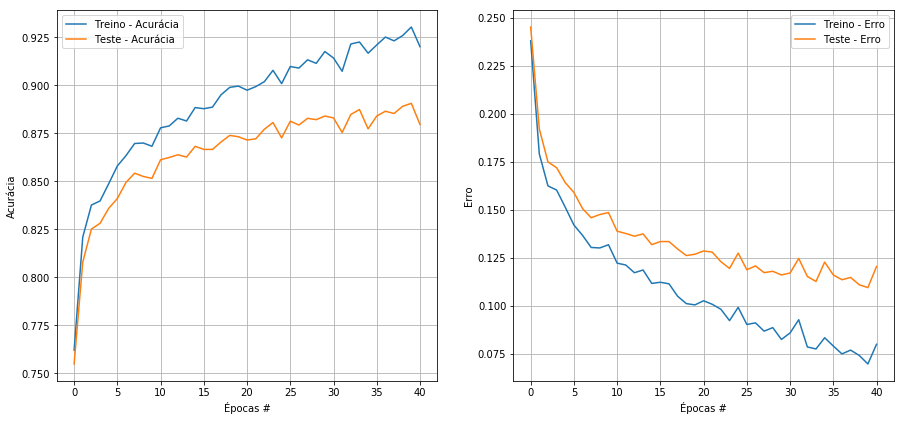

In [17]:
print("Épocas: {}".format(epoch))
print("\n")
print("Treino - Acurácia: {:.4}%".format(treino_acc[-1]*100))
print("Treino - Erro:     {:.4}%".format(treino_loss[-1]*100))
print("\n")
print("Teste - Acurácia: {:.4}".format(teste_acc[-1]*100))
print("Teste - Erro:     {:.4}".format(teste_loss[-1]*100))
plt.figure(figsize=(15, 15))
plt.subplot(221)
plt.plot(treino_acc, label = 'Treino - Acurácia')
plt.plot(teste_acc, label = 'Teste - Acurácia')
plt.xlabel("Épocas #")
plt.ylabel("Acurácia")
plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(treino_loss, label = 'Treino - Erro')
plt.plot(teste_loss, label = 'Teste - Erro')
plt.xlabel("Épocas #")
plt.ylabel("Erro")
plt.legend()
plt.grid()

In [18]:
# Colocando os nomes das classes em uma variável
nomeClasses = ["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Tornozeleira"]

In [19]:
from sklearn.metrics import classification_report

In [20]:
# Mostrando precisão, recall e f1-score do modelo MLP
print(classification_report(y_test, teste_predicao, target_names = nomeClasses))

              precision    recall  f1-score   support

    Camiseta       0.77      0.90      0.83      1000
       Calça       0.99      0.97      0.98      1000
     Pulôver       0.70      0.90      0.79      1000
     Vestido       0.87      0.91      0.89      1000
      Casaco       0.83      0.77      0.80      1000
    Sandália       0.97      0.96      0.96      1000
      Camisa       0.85      0.51      0.64      1000
       Tênis       0.95      0.94      0.95      1000
       Bolsa       0.97      0.97      0.97      1000
Tornozeleira       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

